In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
def visualize(model):
    rcs_file = "./output/" + model + '_rcs.csv'
    data = np.genfromtxt (rcs_file, delimiter=",")
    # ignore freq
    data=data[:,1:]
    rows, row_pos = np.unique(data[:, 0], return_inverse=True)
    cols, col_pos = np.unique(data[:, 1], return_inverse=True)

    pivot_table = np.zeros((len(rows), len(cols)), dtype=data.dtype)
    pivot_table[row_pos, col_pos] = data[:, 2]
    pivot_table = pivot_table.T
    fig, ax = plt.subplots(figsize=(14, 6))
    ax = sns.heatmap(pivot_table, cmap="Spectral", square=True)
    title = 'RCS of '+model
    ax.set_title(title, weight='bold')
    ax.set_xlabel('Azimuth in Degree')
    ax.set_ylabel('Polar Angle in Degree')
    ax.collections[0].colorbar.set_label("RCS in dBsqm2")
    plt.show()

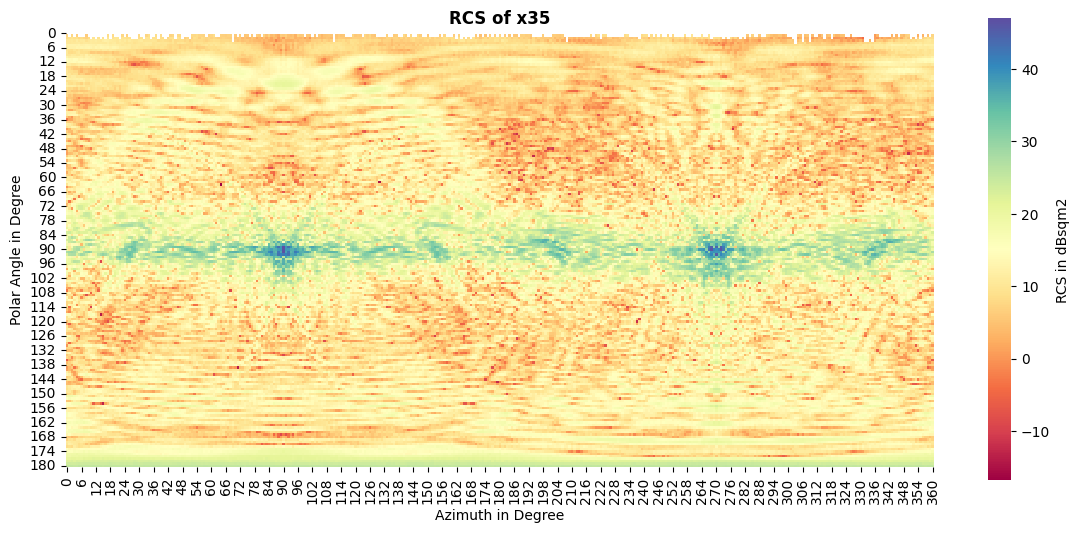

In [10]:
visualize("x35")

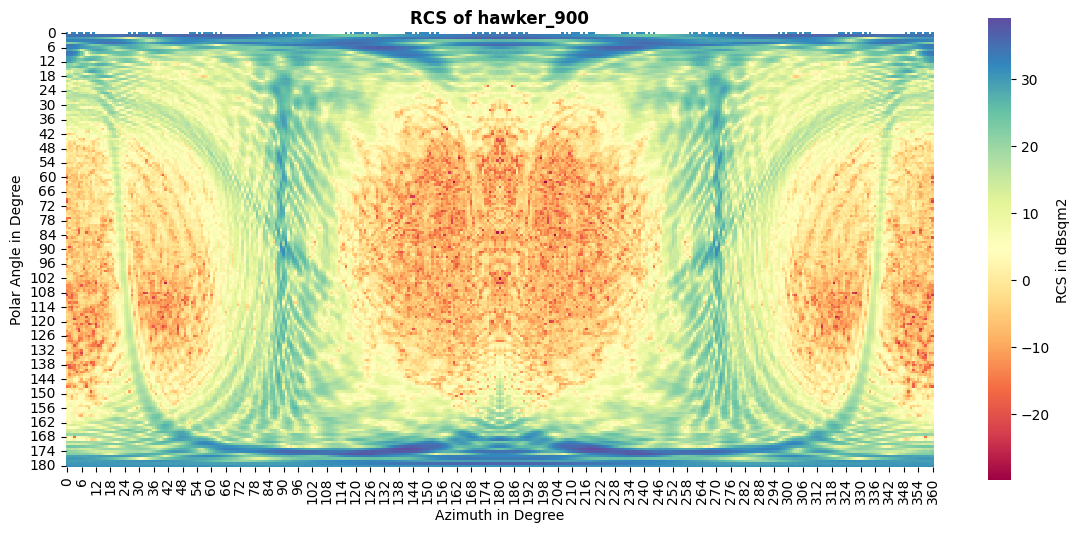

In [11]:
visualize("hawker_900")

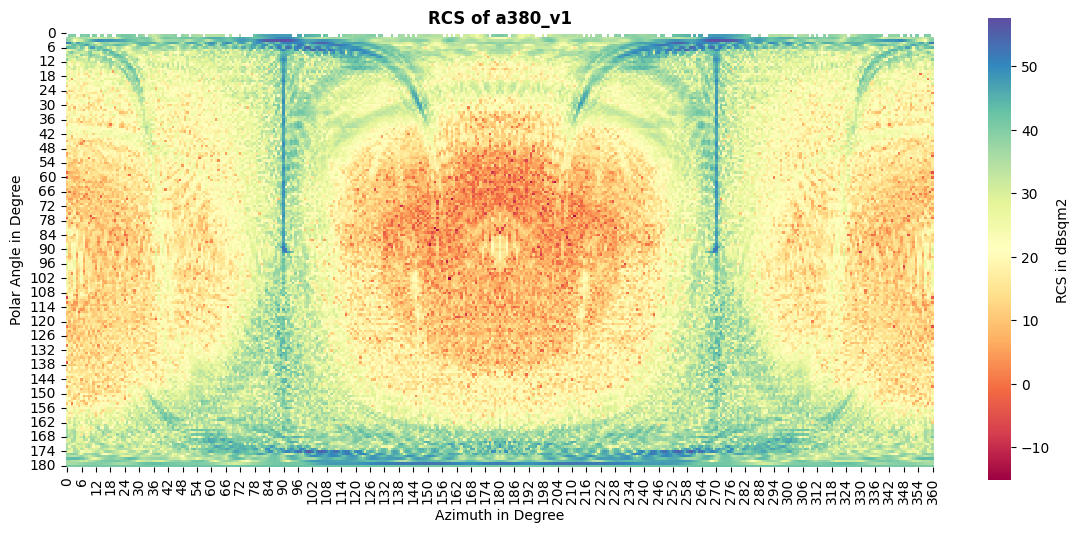

In [12]:
visualize("a380_v1")